In [1]:
import pandas as pd
# Load the cleaned data
df = pd.read_csv("cleaned_lendingclub.csv")
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_default
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,0
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,0
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,0
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,0
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,...,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,0


### 1. Check Class Balance (Default vs Non-Default)

<AxesSubplot:title={'center':'Class Distribution'}>

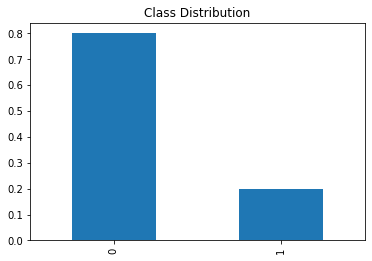

In [2]:
df['loan_default'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')

### 2. Default Rate by Loan Grade

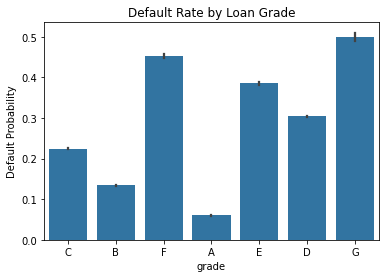

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='grade', y='loan_default', data=df)
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Probability")
plt.show()


### 3. Default Rate by Loan Purpose

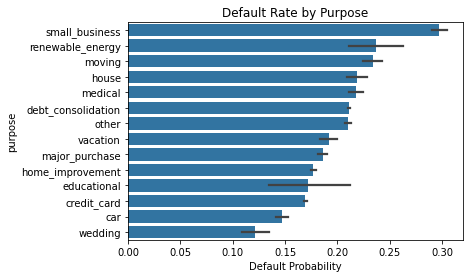

In [4]:
purpose_order = df.groupby('purpose')['loan_default'].mean().sort_values(ascending=False).index
sns.barplot(x='loan_default', y='purpose', data=df, order=purpose_order)
plt.title("Default Rate by Purpose")
plt.xlabel("Default Probability")
plt.show()


### 4. Numerical Distributions: DTI, FICO, Annual Income

Text(0.5, 1.0, 'Log(Annual Income) by Default Status')

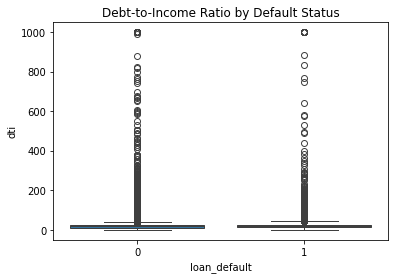

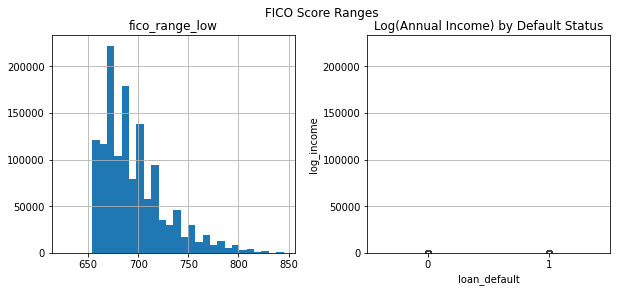

In [5]:
# DTI vs Default
sns.boxplot(x='loan_default', y='dti', data=df)
plt.title("Debt-to-Income Ratio by Default Status")

# FICO Score Distribution
df[['fico_range_low', 'fico_range_high']].hist(bins=30, figsize=(10,4))
plt.suptitle("FICO Score Ranges")

# Annual Income (Log-scaled to handle skew)
import numpy as np
df['log_income'] = np.log1p(df['annual_inc'])
sns.boxplot(x='loan_default', y='log_income', data=df)
plt.title("Log(Annual Income) by Default Status")


Text(0.5, 1.0, 'Log(Annual Income) by Default Status')

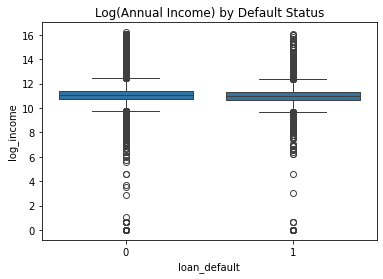

In [6]:
import numpy as np
df['log_income'] = np.log1p(df['annual_inc'])

sns.boxplot(x='loan_default', y='log_income', data=df)
plt.title("Log(Annual Income) by Default Status")


# PERSONAL NOTE

📊 Summary of Your Insights So Far:
✅ 1. Class Imbalance
Majority are non-default (label 0).

Default rate is roughly 20–25% — this is imbalanced but not extreme.

Consider techniques like SMOTE, class weights, or threshold tuning later.

✅ 2. Default Rate by Grade
Loans graded F & G have highest default risk.

Grade A loans are safest.

💡 You can use grade as a strong categorical feature.

✅ 3. Purpose vs Default
Small business, renewable energy, medical, and moving loans have higher default rates.

Car, credit card, and wedding loans are safer.

💡 Consider grouping rare/risky purposes together.

✅ 4. DTI Distribution
Wide spread; outliers exist.

DTI values >100 are suspicious — may need outlier removal or capping.

✅ 5. FICO Range
Majority of borrowers fall between 660 and 740.

Lower scores = higher risk.

You can bucket FICO scores for modeling.

## Minor checks 

1. emp_length is still a string like "10+ years" — needs conversion

2. term is still a string like "36 months" — needs numeric conversion

3. issue_d, last_pymnt_d etc. — confirm all relevant date columns are datetime

4. If sub_grade exists — might be more granular than grade, worth exploring

5. home_ownership, purpose, verification_status — will need one-hot or label encoding

6. Any unexpected nulls? → df.isnull().sum().sort_values(ascending=False).head(10)

In [9]:
# 1. Check emp_length format
print("Unique emp_length values:")
print(df['emp_length'].value_counts(dropna=False))

# 2. Check term format
print("\nUnique term values:")
print(df['term'].value_counts(dropna=False))

# 3. Confirm all relevant date columns are datetime
date_cols = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in df.columns:
        print(f"\n{col} dtype: {df[col].dtype}")

# 4. Check sub_grade granularity (if exists)
if 'sub_grade' in df.columns:
    print("\nSample sub_grade values:")
    print(df['sub_grade'].value_counts().sort_index())

# 5. Check top categorical features for encoding
for col in ['home_ownership', 'purpose', 'verification_status']:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts(dropna=False))

# 6. Check top null columns
print("\nTop 10 columns with missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Unique emp_length values:
10    520710
2     121743
0     108061
3     107597
1      88494
5      84154
4      80556
6      62733
8      60701
7      59624
9      50937
Name: emp_length, dtype: int64

Unique term values:
36    1020743
60     324567
Name: term, dtype: int64

Sample sub_grade values:
A1    43678
A2    37178
A3    37996
A4    52235
A5    64003
B1    71153
B2    74024
B3    81827
B4    83199
B5    82538
C1    85494
C2    79213
C3    74998
C4    74421
C5    67560
D1    51321
D2    44848
D3    39317
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: sub_grade, dtype: int64

Unique values in home_ownership:
MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

Unique values in purpose:
debt_consolidation    780321
credit_card           295279
home_improvement    

In [8]:
import pandas as pd
import numpy as np

### ---------- 1. Convert emp_length to numeric ----------
def parse_emp_length(val):
    if pd.isnull(val):
        return np.nan
    if val == '< 1 year':
        return 0
    elif val == '10+ years':
        return 10
    else:
        return int(val.strip().split()[0])

df['emp_length'] = df['emp_length'].apply(parse_emp_length)

### ---------- 2. Convert term to integer ----------
df['term'] = df['term'].str.extract('(\d+)').astype(int)

### ---------- 3. Convert date columns to datetime ----------
date_cols = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')

### ---------- 4. Drop next_pymnt_d (too many missing) ----------
df.drop(columns=['next_pymnt_d'], inplace=True, errors='ignore')

### ---------- 5. Combine rare values in home_ownership ----------
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY', 'OTHER'], 'OTHER')

### ---------- 6. Combine rare purposes (<5000 loans) ----------
purpose_counts = df['purpose'].value_counts()
rare_purposes = purpose_counts[purpose_counts < 5000].index
df['purpose'] = df['purpose'].replace(rare_purposes, 'other')

### ---------- 7. Create average FICO score ----------
df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2

### ---------- 8. Create year/month features from issue_d ----------
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

### ---------- 9. Drop unused or duplicate columns ----------
drop_cols = [
    'fico_range_low', 'fico_range_high', 'issue_d',
    'last_pymnt_d', 'last_credit_pull_d'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [13]:
# Load just the issue_d column from original raw file
raw_issue_d = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=['issue_d'], low_memory=False)

# Reattach to current df (assumes row order hasn’t changed)
df['issue_d'] = pd.to_datetime(raw_issue_d['issue_d'], format='%b-%Y', errors='coerce')

# Now extract year and month
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# Verify
df[['issue_d', 'issue_year', 'issue_month']].head()


,issue_d,issue_year,issue_month
0,2015-12-01,2015.0,12.0
1,2015-12-01,2015.0,12.0
2,2015-12-01,2015.0,12.0
3,2015-12-01,2015.0,12.0
4,2015-12-01,2015.0,12.0


In [12]:
df[['issue_d', 'issue_year', 'issue_month']].head()


,issue_d,issue_year,issue_month
0,NaT,NaN,NaN
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,NaT,NaN,NaN


In [14]:
df.to_csv("pre_encoded_lendingclub.csv", index=False)
